# Punto 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brownian_motion as bm 
from scipy.stats import jarque_bera
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime



In [2]:
#Función de plot:
def plotear(nombre_proceso,time, mu_teor_t,mu_hat_t, var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,1]):
    """
    Plotear comparaciones de vector de medias y varianzas teóricas y empíricas
    """
    fig = plt.figure(figsize=(15, 7))
    # paths
    title = f"Comparación media teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 1)
    plt.plot(time, np.array([mu_teor_t,mu_hat_t]).T)
    plt.legend(["media teórica","media empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    #correlation
    title = f"Comparación varianza teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 2)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array([var_teor_t,var_hat_t]).T)
    plt.legend(["varianza teórica","varianza empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


    plt.subplot(2, 2, 3)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(mu_error).T)
    plt.legend(["Error en media simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(2, 2, 4)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(var_error).T)
    plt.legend(["Error en varianza simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

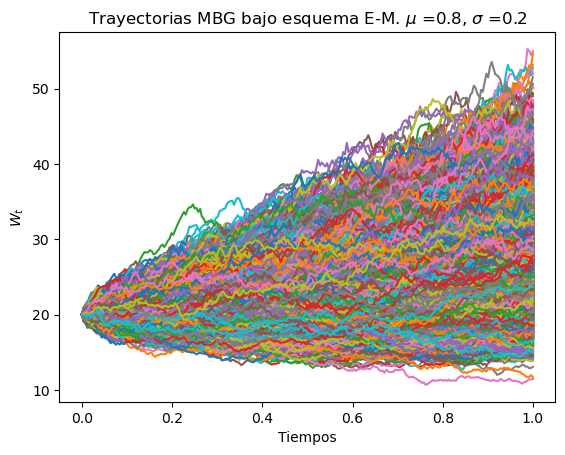

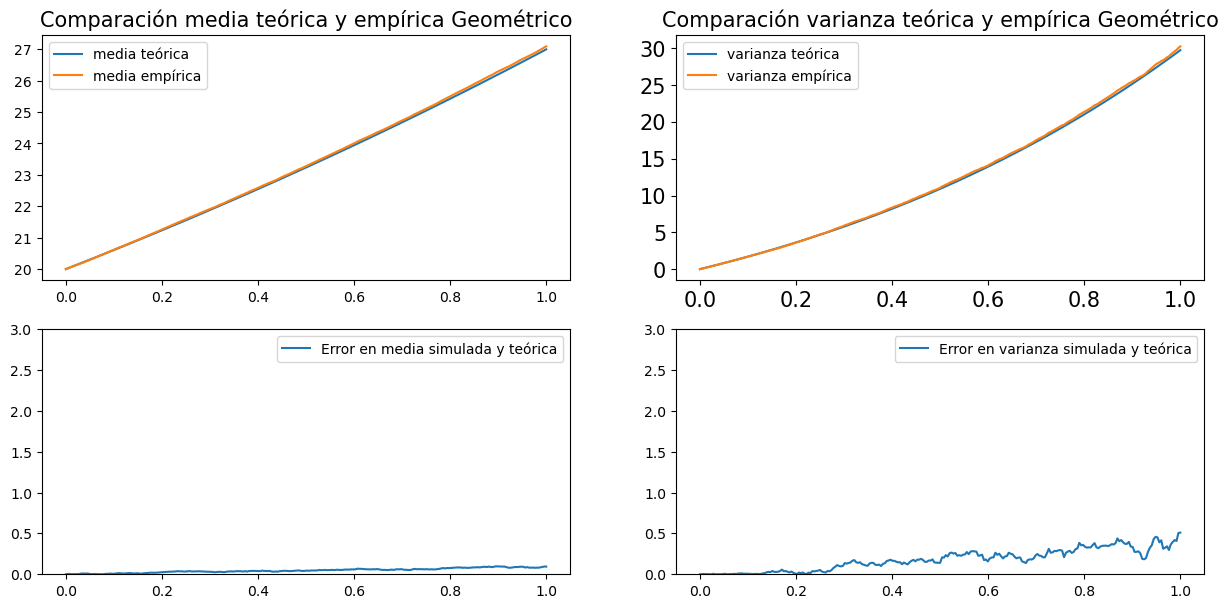

In [21]:
#Numeral 2
T=1
n=253
d=10000
time=np.linspace(0,T,n)
dt=T/(n-1)
G_0=20
mu=0.3
sigma=0.2

G=bm.EM_geom_brown(G_0,mu,sigma,n,d,dt=dt)
#G_teor=bm.teor_solut_GBM(G_0,mu,sigma,n,d,T)


fig, ax = plt.subplots()
ax.plot(time,G.T)
ax.set_title(f"Trayectorias MBG bajo esquema E-M. $\mu$ ={mu}, $\sigma$ ={sigma}")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 

mu_teor_t,cov_teor=bm.geometric_theoret_mu_cov(G_0,time,alpha=mu-sigma**2/2,lamda=sigma)
mu_hat_t,cov_hat=bm.empiric_mu_cov(G)

var_hat_t=np.diag(cov_hat)
var_teor_t=np.diag(cov_teor)

mu_error=bm.error(mu_hat_t,mu_teor_t)
var_error=bm.error(var_hat_t,var_teor_t)

plotear("Geométrico",time, mu_teor_t,mu_hat_t,var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,3])


In [ ]:
##Tomado de https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/
def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    # Return the Hurst exponent from the np.polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = np.log(np.cumsum(np.random.randn(100000))+1000)
mr = np.log(np.random.randn(100000)+1000)
tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print("Hurst(GBM):   %s" % hurst(gbm))
print("Hurst(MR):    %s" % hurst(mr))
print("Hurst(TR):    %s" % hurst(tr))

# Assuming you have run the above code to obtain 'goog'!
print("Hurst(GOOG):  %s" % hurst(goog['Adj Close'].values))

In [58]:
np.random.seed(0)
df = pd.DataFrame(10 + np.random.randn(10).cumsum(), columns=['price'])
df.price-df.price.shift(1)

0         NaN
1    0.400157
2    0.978738
3    2.240893
4    1.867558
5   -0.977278
6    0.950088
7   -0.151357
8   -0.103219
9    0.410599
Name: price, dtype: float64

In [64]:
yf.pdr_override()
inicio=datetime(2020,1,1)
fin=datetime(2022,11,12)
data=pdr.get_data_yahoo("ACN",inicio,fin)
data.drop(["Open","Adj Close","Volume"],axis=1,inplace=True)
data


[*********************100%%**********************]  1 of 1 completed


,High,Low,Close
Date,,,
2020-01-02,211.919998,208.809998,210.149994
2020-01-03,210.630005,207.000000,209.800003
2020-01-06,208.789993,206.809998,208.429993
2020-01-07,206.259995,203.190002,203.929993
2020-01-08,205.449997,203.529999,204.330002
...,...,...,...
2022-11-07,269.109985,261.369995,269.070007
2022-11-08,274.899994,266.119995,269.029999
2022-11-09,269.190002,265.369995,266.440002


<Axes: xlabel='Date'>

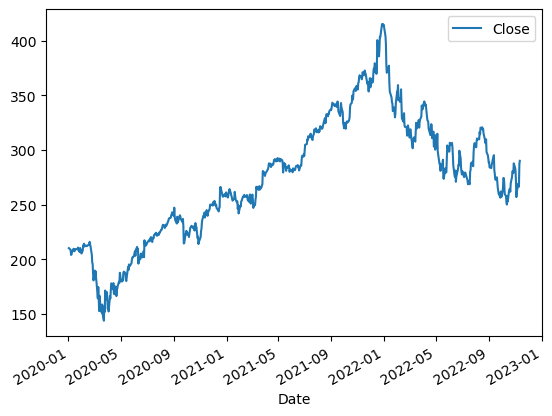

In [65]:
data[["Close"]].plot()

In [81]:
data["Gross_ret"]=data["Close"].pct_change()
data["Log_ret"]=np.log1p(data["Gross_ret"])

<Axes: xlabel='Date'>

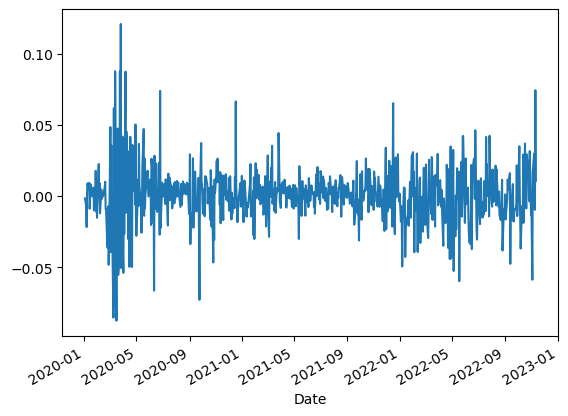

In [82]:
data["Log_ret"].plot()

In [63]:
jarque_bera(data["Log_ret"][1:])

SignificanceResult(statistic=590.2977840863342, pvalue=6.583621363006747e-129)

In [ ]:
np.log1p

In [17]:
a=np.array([[2,3]])
a.ndim

2